

```
# This is formatted as code
```

# Your Uni : fsa2139
# Your AI Model Share Username: fsarshad
# Your Full name : Faaz Saad Arshad
# Link to your Public Github repository with Final report:
https://github.com/fsarshad/fsa2139_Assignment1ML


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Share your models to a centralized leaderboard
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



In [ ]:
#install aimodelshare library
! pip install aimodelshare --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.

## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [ ]:
# Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [ ]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1) ## Examine what this does and write in next cell

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [ ]:
# Your answer: y_train_labels = y_train.idxmax(axis=1) finds the column index with the highest value for each row in y_train. The y_train dataframe has, values that are 0 or 1, indicating whether that label is present for that data point. The y_train_label indetifies which label was predicted for each data point based on the one-hot encoded data in y_train.

##  Add new data

In [ ]:
# Truncated and cleaned up region data to merge (Week 4 folder)
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.


In [ ]:
print(X_train.head())
print(countrydata.head())

  Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attack

In [ ]:
print(X_train.columns)
print(countrydata.columns)

Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'region', 'sub-region',
       'Terrorist_attacks'],
      dtype='object')
Index(['country_name', 'population', 'population_below_poverty_line', 'hdi',
       'life_expectancy', 'expected_years_of_schooling',
       'mean_years_of_schooling', 'gni'],
      dtype='object')


In [ ]:
X_train = pd.merge(left=X_train, right=countrydata, left_on='Country or region', how='left', right_on = 'country_name')
X_test = pd.merge(left=X_test, right=countrydata, left_on='Country or region', how='left', right_on = 'country_name')

In [ ]:
X_train.head(1)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Peru,0.96,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.0,Peru,32165485.0,22.7,0.739749,74.814,13.38634,9.01347,11294.84033


# EDA

In [ ]:
print(X_train.dtypes)

Country or region                 object
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
name                              object
region                            object
sub-region                        object
Terrorist_attacks                float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
X_train.dtypes.value_counts()

float64    14
object      5
dtype: int64

In [ ]:
## Your answer: When I run print(countrydata.dtypes), I see the variable names like 'Country_name' and the different type of panda data types like float64 or Object. The dtype in accordance to there variable name makesense to me. For example, life expectancy, mean_years_of_schooling, mean_years_of_schooling should be float64's since they are numerical values. While variables like name, country_name, subregion should be objects since they are categorical. Decimal values are more precise in calculation when its a float64 type.

Find out the number and percentage of missing values in the table per column

In [ ]:
# Your code here:
nullval = X_train.isnull().sum()
print(nullval)

Country or region                 0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
name                              0
region                            0
sub-region                        0
Terrorist_attacks                 0
country_name                      6
population                        6
population_below_poverty_line    15
hdi                               6
life_expectancy                   6
expected_years_of_schooling       6
mean_years_of_schooling           6
gni                               6
dtype: int64


In [ ]:
percentcalc = nullval / len(X_train)*100
print(percentcalc)

Country or region                 0.000000
GDP per capita                    0.000000
Social support                    0.000000
Healthy life expectancy           0.000000
Freedom to make life choices      0.000000
Generosity                        0.000000
Perceptions of corruption         0.000000
name                              0.000000
region                            0.000000
sub-region                        0.000000
Terrorist_attacks                 0.000000
country_name                      6.818182
population                        6.818182
population_below_poverty_line    17.045455
hdi                               6.818182
life_expectancy                   6.818182
expected_years_of_schooling       6.818182
mean_years_of_schooling           6.818182
gni                               6.818182
dtype: float64


Plot the frequency distribution / histogram of some of the numerical features that you think are important

In [ ]:
X_train.columns

Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'name', 'region', 'sub-region',
       'Terrorist_attacks', 'country_name', 'population',
       'population_below_poverty_line', 'hdi', 'life_expectancy',
       'expected_years_of_schooling', 'mean_years_of_schooling', 'gni'],
      dtype='object')

In [ ]:
# Your plotting code here:
import pandas as pd
import matplotlib.pyplot as plt


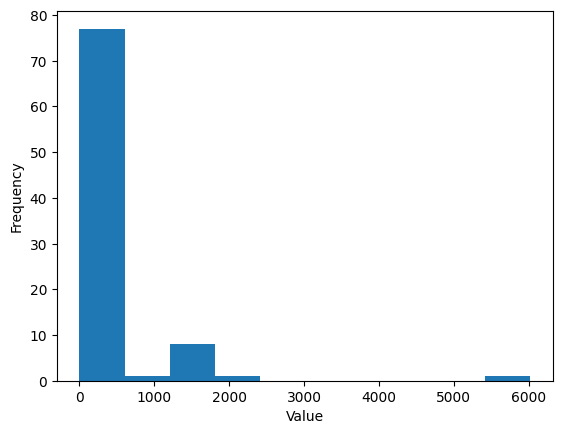

In [ ]:
X_train = pd.read_csv('/content/world_happiness_competition_data/X_train.csv')
plt.hist(X_train['Terrorist_attacks'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

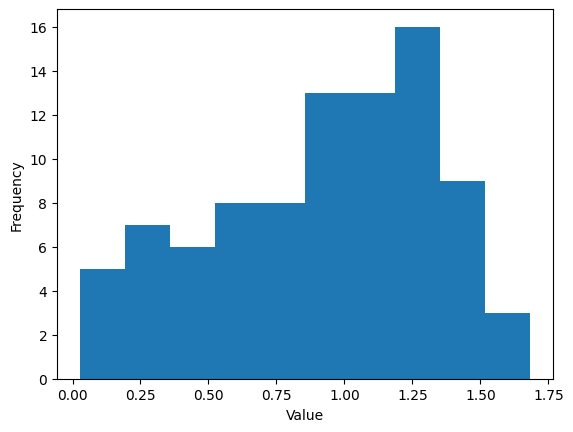

In [ ]:
X_train = pd.read_csv('/content/world_happiness_competition_data/X_train.csv')
plt.hist(X_train['GDP per capita'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

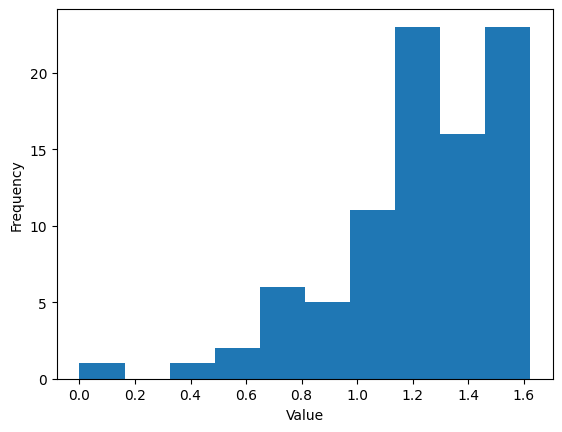

In [ ]:
X_train = pd.read_csv('/content/world_happiness_competition_data/X_train.csv')
plt.hist(X_train['Social support'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

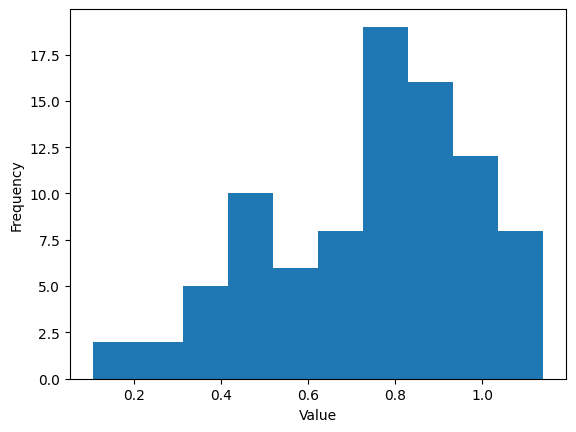

In [ ]:
X_train = pd.read_csv('/content/world_happiness_competition_data/X_train.csv')
plt.hist(X_train['Healthy life expectancy'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Plot the categorical variables and their distribution

Text(0.5, 1.0, 'Distribution of Region Name')

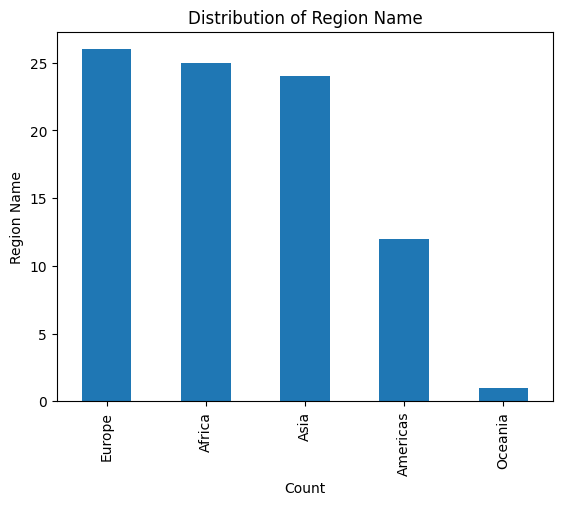

In [ ]:
X_train["region"].value_counts().plot(kind = "bar")
plt.xlabel("Count")
plt.ylabel("Region Name")
plt.title("Distribution of Region Name")

Explore relationships between variables(bivariate, etc), correlation tables, and how they associate with the target variable.

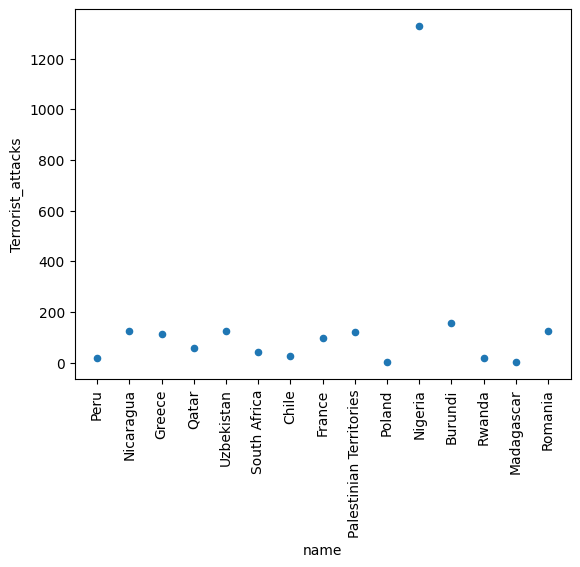

In [ ]:
# Your plotting code(s) here:

data = pd.read_csv('/content/world_happiness_competition_data/X_train.csv')
data.iloc[:15].plot(x = 'name', y = 'Terrorist_attacks', kind = 'scatter');
plt.xticks(rotation=90);
plt.show()

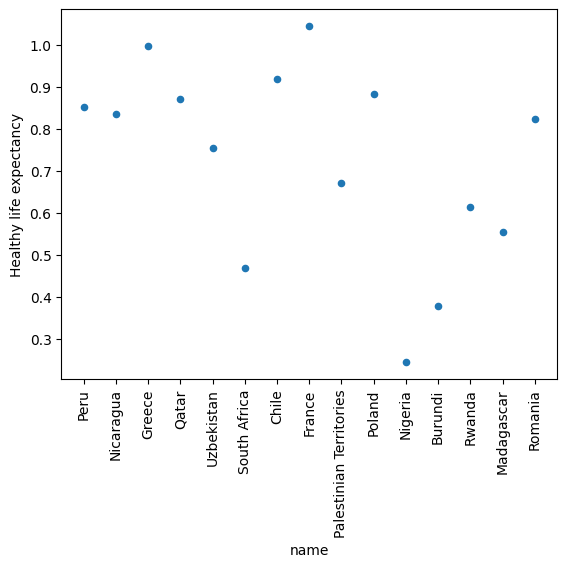

In [ ]:
data = pd.read_csv('/content/world_happiness_competition_data/X_train.csv')
data.iloc[:15].plot(x = 'name', y = 'Healthy life expectancy', kind = 'scatter');
plt.xticks(rotation=90);
plt.show()

Write what you observed and your General comments on what should be done:

In [ ]:
# In the above charts I took the first 15 countries to understand which country has the highest number of terrorist attacks and which country has a healthy life expectancy. From the first graph I noticed Nigeria has the highest number of terrorist attacks while Madagascar has the lowest. I used scatter plot for both charts. In the second chart, France has a healthy life expectancy while Nigeria does not.

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

## Drop all the non-numerical features from X_train
numeric_features = X_train.select_dtypes(include=['int64', 'float64'])


numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  ## Fill here )),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer : First I imported the necessary libraries to build the preprocessor code affectively. Next, I wanted to split the numerical and categorical features. So, I used this code to
## numeric_features = X_train.select_dtypes(include=['int64', 'float64']) to define numerical features. It also helped to Drop all the non-numerical features from X_train. This next line of code,SimpleImputer(strategy='constant', fill_value=0)), is good enough because it replaces missing values.
## Then I used this code categorical_features = ['region', 'sub-region'] to define categorical features. Afterwards, I Replaced missing values with model value and then applied one hot coding.
## Afterwards, I created a final preprocessor object set up woth column transformer. Meaining, I joined both numeric and categorical features to 1 transformer. Afterwards I fit the preprocessor object.

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
## Your Answer:
## Preprocessor object is: Allows to link all the transformers together for a smooth dataframe.
## preprocess Object is: Preprocess object primarly processes on categorical features.
## Preprocessor function is: It stops the overabundance of features in categorical features.
## Preprocessed_data is: Its the end data result of your prepocessing.

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

In [ ]:
 preprocessor(X_train)

array([[ 0.10444464,  0.20603101,  0.45831144, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54388211,  0.38059533,  0.37791099, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64309205, -0.19786289,  1.07189386, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01356448,  1.10965806,  1.05919905, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27261963, -0.30397062,  0.62334396, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5950658 , -1.4198131 , -1.00582315, ...,  1.        ,
         0.        ,  0.        ]])

##3. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [ ]:
y_train.head()

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier


## Define a Random Forest Model here, fit it, and score it

## Your cell should have a score between 0-1 as output


y_train_labels = y_train.idxmax(axis=1)

model = RandomForestClassifier()
model.fit(preprocessor(X_train), y_train_labels)

train_score = model.score(preprocessor(X_train), y_train_labels)
print("Model training score is {}".format(round(train_score, 6)))

Model training score is 1.0


#### Save preprocessor function to local "preprocessor.zip" file

In [ ]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [ ]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground
## Do not change this
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [ ]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1:

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

model_filepath1 = "model.onnx"
preprocessor_filepath="preprocessor.zip"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath1,
                           preprocessor=preprocessor_filepath,
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): model
Provide any useful notes about your model (optional): assignmentmodel1

Your model has been submitted as model version 1109

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data.head())

,accuracy,f1_score,precision,recall,ml_framework,deep_learning,model_type,depth,num_params,flatten_layers,batchnormalization_layers,dropout_layers,dense_layers,sigmoid_act,relu_act,tanh_act,softmax_act,swish_act,gelu_act,loss,optimizer,memory_size,team,username,version
0,55.88%,53.97%,78.98%,59.29%,sklearn,nan,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,stellawong,885
1,55.88%,53.94%,68.21%,58.14%,sklearn,nan,RandomForestClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6,sdp2158,510
2,58.82%,57.65%,65.59%,59.50%,sklearn,nan,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,four,ran_liao,299
3,58.82%,57.65%,65.59%,59.50%,sklearn,nan,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,xilin0323,734
4,58.82%,57.65%,65.59%,59.50%,sklearn,nan,GradientBoostingClassifier,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,yatharth,58


## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

l = [1,5,10, 25]
output = []
for i in l:
  model = RandomForestClassifier(n_estimators = i)
  model.fit(preprocessor(X_train), y_train_labels)

  output.append(model.score(preprocessor(X_train), y_train_labels))

output

[0.8068181818181818, 0.9659090909090909, 1.0, 1.0]

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer : 10 is the optimal number of estimators we should use for this data set. Otherwise the n value on either side of 10 will result in drop of accuracy.

In [ ]:
len(X_train.columns)

11

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Get count of preprocessed features
feature_count=  len(X_train.columns)

# Insert correct number of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

# Serialize your model to save it as an onnx file


In [ ]:
#Submit Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels = model.predict(preprocessor(X_test))
# Predict
model_filepath2 = "model.onnx"
# Your serialized model

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath2,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

Insert search tags to help users find your model (optional): 1mod
Provide any useful notes about your model (optional): assignmodelrand

Your model has been submitted as model version 1110

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Compare two or more models
data=mycompetition.compare_models([2,3], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_2,model_version_3
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,3,5
5,max_features,auto,auto,auto
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_impurity_split,None,None,None


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer: Trying random values is not plausible an alternative method would be to use gridsearchcv. Through gridsearchcv we can understand fit, score, prediction, apply transform.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Use np.arange to create a sequence of numbers for each parameter's space you think should be searched
param_grid = {'n_estimators': np.arange(1, 15, 1)}  # Number of trees in the forest


# Read GridSearchCV docs and create an object with RandomForestClassifier as the model
gridmodel = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

#use model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)


#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.680
best parameters: {'n_estimators': 9}


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3:

#-- Generate predicted values


# Submit to Competition Leaderboard



prediction_labels = gridmodel.predict(preprocessor(X_test))

model_filepath2 = "model.onnx"


mycompetition.submit_model(model = model_filepath2,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)


Insert search tags to help users find your model (optional): 1modelforest
Provide any useful notes about your model (optional): forestrand3

Your model has been submitted as model version 1111

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Compare two or more models
data=mycompetition.compare_models([3,4], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_3,model_version_4
0,bootstrap,True,True,True
1,ccp_alpha,0.000000,0.000000,0.000000
2,class_weight,None,None,None
3,criterion,gini,gini,gini
4,max_depth,None,5,5
5,max_features,auto,auto,auto
6,max_leaf_nodes,None,None,None
7,max_samples,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000
9,min_impurity_split,None,None,None


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = RandomForestClassifier(n_estimators = 8)## Read documentations of imported models and fit them.
model.fit(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

model_filepath4 = "model.onnx"

# Submit model to Competition Leaderboard
mycompetition.submit_model(model = model_filepath4,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)


Insert search tags to help users find your model (optional): rand3for
Provide any useful notes about your model (optional): forest3

Your model has been submitted as model version 1112

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:

# 6. Basic Deep Learning

In [ ]:
preprocessor(X_train)

array([[ 0.10444464,  0.20603101,  0.45831144, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54388211,  0.38059533,  0.37791099, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64309205, -0.19786289,  1.07189386, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01356448,  1.10965806,  1.05919905, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27261963, -0.30397062,  0.62334396, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5950658 , -1.4198131 , -1.00582315, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
preprocessor(X_train).shape

(88, 26)

In [ ]:
y_train

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
83,1,0,0,0,0
84,0,0,1,0,0
85,0,0,0,1,0
86,1,0,0,0,0


In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#count features in input data

fcount = preprocessor(X_train).shape[1]
print(f"Count: {fcount}")


keras = Sequential()

# first layer
keras.add(Dense(128, input_dim=fcount))
keras.add(Activation('relu'))

# second layer
keras.add(Dense(64))
keras.add(Activation('relu'))

# third layer
keras.add(Dense(64))
keras.add(Activation('relu'))

# fourth layer
keras.add(Dense(32))
keras.add(Activation('relu'))

# output
keras.add(Dense(5))
keras.add(Activation('softmax'))


#Use Softmax activation in last layer.

# Compile model
keras.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# Fitting the NN to the Training set

kerasNN = keras.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)



Count: 26
Epoch 1/300
4/4 [==============================] - 1s 54ms/step - loss: 1.6142 - accuracy: 0.2727 - val_loss: 1.6046 - val_accuracy: 0.2727
Epoch 2/300
4/4 [==============================] - 0s 10ms/step - loss: 1.6057 - accuracy: 0.3030 - val_loss: 1.6011 - val_accuracy: 0.2727
Epoch 3/300
4/4 [==============================] - 0s 15ms/step - loss: 1.5973 - accuracy: 0.3030 - val_loss: 1.5967 - val_accuracy: 0.2727
Epoch 4/300
4/4 [==============================] - 0s 16ms/step - loss: 1.5889 - accuracy: 0.3182 - val_loss: 1.5935 - val_accuracy: 0.2727
Epoch 5/300
4/4 [==============================] - 0s 17ms/step - loss: 1.5812 - accuracy: 0.3182 - val_loss: 1.5911 - val_accuracy: 0.3182
Epoch 6/300
4/4 [==============================] - 0s 10ms/step - loss: 1.5739 - accuracy: 0.3939 - val_loss: 1.5882 - val_accuracy: 0.4091
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 1.5666 - accuracy: 0.4242 - val_loss: 1.5843 - val_accuracy: 0.4545
Epoch 8/30

In [ ]:
print(fcount)

26


In [ ]:
##How many neurons should there be in the last layer?
## There should be 5 neurons in the last layer. Dense (5).

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer: The activation I used in the middle layers was relu activation function. My final layer I used was softmax. I used softmax in final layer because it ensured a valid probability distribution.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer: 300 is a good number for epoch. Underfitting could occur if there are insufficient epochs for the model to identify the underlying patterns in the data. However, if there are an excessive number of epochs, the model might overfit the training set

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer: I used loss = 'categorical_crossentropy' because categorical_crossentropy is the standard loss function. We can understand the predicted destribution for each data point.
## sgd is used because it minimizes the loss function.

Can you try getting the model's training history out and plotting the curves?

In [ ]:
kerasNN.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
kerasNN.history['accuracy']

[0.27272728085517883,
 0.3030303120613098,
 0.3030303120613098,
 0.3181818127632141,
 0.3181818127632141,
 0.39393940567970276,
 0.42424243688583374,
 0.43939393758773804,
 0.469696968793869,
 0.5151515007019043,
 0.560606062412262,
 0.5757575631141663,
 0.6212121248245239,
 0.6212121248245239,
 0.6363636255264282,
 0.5909090638160706,
 0.6060606241226196,
 0.6212121248245239,
 0.6363636255264282,
 0.6363636255264282,
 0.6212121248245239,
 0.6212121248245239,
 0.6363636255264282,
 0.6363636255264282,
 0.6515151262283325,
 0.6363636255264282,
 0.6363636255264282,
 0.6515151262283325,
 0.6363636255264282,
 0.6363636255264282,
 0.6212121248245239,
 0.6212121248245239,
 0.6212121248245239,
 0.6363636255264282,
 0.6212121248245239,
 0.6363636255264282,
 0.6363636255264282,
 0.6212121248245239,
 0.6363636255264282,
 0.6212121248245239,
 0.6212121248245239,
 0.6212121248245239,
 0.6060606241226196,
 0.6060606241226196,
 0.6212121248245239,
 0.6212121248245239,
 0.6212121248245239,
 0.62121212

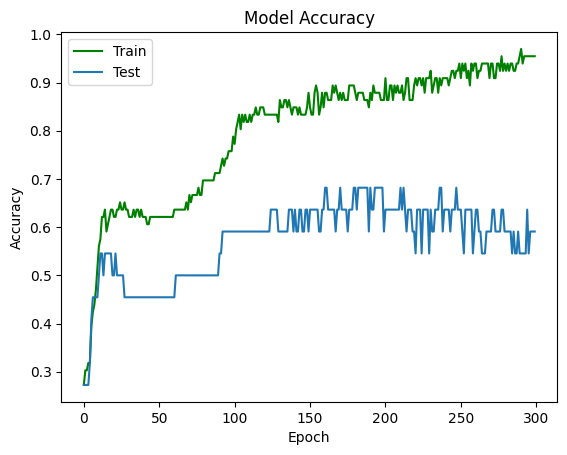

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

plt.plot(kerasNN.history['accuracy'], c = 'green')
plt.plot(kerasNN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()



In [ ]:
# Save keras model to ONNX file

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Submit keras model:

#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models

# Predict
prediction_column_index = keras.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

model_filepath5 = "model.onnx"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath5,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

3/3 [==============================] - 0s 2ms/step
Insert search tags to help users find your model (optional): predict model 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1114

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Check leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

Output hidden; open in https://colab.research.google.com to view.